## 1. Explore Data

#### Import required libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import itertools
import datetime
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\Users\shiva\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the data

In [3]:
df = pd.read_excel('Homeless in U.S.updated.xlsx')
df['Percentage 1'] = df['Percentage 1']*100
df['Percentage 2 - USICH'] = df['Percentage 2 - USICH']*100
df.drop(['Unnamed: 5'], axis=1, inplace=True)
df.head()

State  Total Homeless  Population  Percentage 1  Percentage 2 - USICH  \
0  California        151278.0  39512223.0      0.382864                 26.73   
1    New York         92091.0  19453561.0      0.473389                 16.27   
2     Florida         28328.0  21477737.0      0.131895                  5.01   
3       Texas         25848.0  28995881.0      0.089144                  4.57   
4  Washington         21577.0   7614893.0      0.283353                  3.81   

   Homeless Households  Veterans  Young Adults  
0               7044.0   10980.0       11993.0  
1              15091.0    1270.0        2978.0  
2               2171.0    2472.0        1450.0  
3               1919.0    1806.0        1355.0  
4               1751.0    1585.0        1911.0

In [4]:
df.describe()

Total Homeless    Population  Percentage 1  Percentage 2 - USICH  \
count       51.000000  5.100000e+01     51.000000             51.000000   
mean     11023.215686  6.437266e+06      0.154667              1.948627   
std      24161.640344  7.360740e+06      0.147404              4.268965   
min        548.000000  5.787590e+05      0.039783              0.100000   
25%       2315.000000  1.789606e+06      0.085467              0.410000   
50%       4538.000000  4.467673e+06      0.099773              0.800000   
75%       9466.500000  7.446805e+06      0.148006              1.675000   
max     151278.000000  3.951222e+07      0.923983             26.730000   

       Homeless Households      Veterans  Young Adults  
count            50.000000     50.000000     50.000000  
mean           1031.980000    733.160000    693.920000  
std            2324.411073   1561.141084   1723.176372  
min              37.000000     49.000000     26.000000  
25%             187.500000    178.500000    147.250000  
50%             309.000000    403.500000    258.000000  
75%             948.500000    687.250000    576.500000  
max           15091.000000  10980.000000  11993.000000

#### Process data

In [5]:
df = df.iloc[:51, :]
df = df[df.State != 'D.C.']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 50 non-null     object 
 1   Total Homeless        50 non-null     float64
 2   Population            50 non-null     float64
 3   Percentage 1          50 non-null     float64
 4   Percentage 2 - USICH  50 non-null     float64
 5   Homeless Households   50 non-null     float64
 6   Veterans              50 non-null     float64
 7   Young Adults          50 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.5+ KB


In [6]:
df

State  Total Homeless  Population  Percentage 1  \
0       California        151278.0  39512223.0      0.382864   
1         New York         92091.0  19453561.0      0.473389   
2          Florida         28328.0  21477737.0      0.131895   
3            Texas         25848.0  28995881.0      0.089144   
4       Washington         21577.0   7614893.0      0.283353   
5    Massachusetts         18471.0   6949503.0      0.265789   
6           Oregon         15876.0   4217737.0      0.376410   
7     Pennsylvania         13199.0  12801989.0      0.103101   
8          Georgia         10443.0  10617423.0      0.098357   
9             Ohio         10345.0  11689100.0      0.088501   
10        Illinois         10199.0  12671821.0      0.080486   
11         Arizona         10007.0   7278717.0      0.137483   
12        Colorado          9619.0   5758736.0      0.167033   
13  North Carolina          9314.0  10488084.0      0.088806   
14      New Jersey          8862.0   8882190.0      0.099773   
15        Michigan          8575.0   9986857.0      0.085863   
16       Minnesota          7977.0   5639632.0      0.141445   
17       Tennessee          7467.0   6833174.0      0.109276   
18          Nevada          7169.0   3080156.0      0.232748   
19        Maryland          6561.0   6045680.0      0.108524   
21          Hawaii          6412.0   1415872.0      0.452866   
22        Missouri          6179.0   6137428.0      0.100677   
23        Virginia          5783.0   8535519.0      0.067752   
24         Indiana          5471.0   6732219.0      0.081266   
25       Wisconsin          4538.0   5822434.0      0.077940   
26  South Carolina          4172.0   5148714.0      0.081030   
27        Kentucky          4079.0   4467673.0      0.091300   
28        Oklahoma          3944.0   3956971.0      0.099672   
29         Alabama          3261.0   4903185.0      0.066508   
30      New Mexico          3241.0   2096829.0      0.154567   
31     Connecticut          3033.0   3565287.0      0.085070   
32       Louisiana          2941.0   4648794.0      0.063264   
33            Utah          2798.0   3205958.0      0.087275   
34        Arkansas          2717.0   3017825.0      0.090032   
35        Nebraska          2365.0   1934408.0      0.122260   
36          Kansas          2381.0   2913314.0      0.081728   
37           Idaho          2315.0   1787065.0      0.129542   
38            Iowa          2315.0   3155070.0      0.073374   
39           Maine          2106.0   1344212.0      0.156672   
40          Alaska          1907.0    731545.0      0.260681   
41   New Hampshire          1396.0   1359711.0      0.102669   
42   West Virginia          1397.0   1792147.0      0.077951   
43         Montana          1357.0   1068778.0      0.126967   
44     Mississippi          1184.0   2976149.0      0.039783   
45         Vermont          1089.0    623989.0      0.174522   
46    Rhode Island          1055.0   1059361.0      0.099588   
47    South Dakota           995.0    884659.0      0.112473   
48        Delaware           921.0    973764.0      0.094581   
49         Wyoming           548.0    578759.0      0.094685   
50    North Dakota           557.0    762062.0      0.073091   

    Percentage 2 - USICH  Homeless Households  Veterans  Young Adults  
0                  26.73               7044.0   10980.0       11993.0  
1                  16.27              15091.0    1270.0        2978.0  
2                   5.01               2171.0    2472.0        1450.0  
3                   4.57               1919.0    1806.0        1355.0  
4                   3.81               1751.0    1585.0        1911.0  
5                   3.26               3766.0     917.0         480.0  
6                   2.81               1147.0    1438.0        1590.0  
7                   2.33               1569.0     857.0         737.0  
8                   1.85                815.0     801.0         596.0  
9                   1.83    

In [7]:
#!pip install squarify
import squarify 
df_copy = df.copy()

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
df_copy['Statecode'] = df_copy['State'].map(us_state_abbrev)

In [8]:
df_copy.head()

State  Total Homeless  Population  Percentage 1  Percentage 2 - USICH  \
0  California        151278.0  39512223.0      0.382864                 26.73   
1    New York         92091.0  19453561.0      0.473389                 16.27   
2     Florida         28328.0  21477737.0      0.131895                  5.01   
3       Texas         25848.0  28995881.0      0.089144                  4.57   
4  Washington         21577.0   7614893.0      0.283353                  3.81   

   Homeless Households  Veterans  Young Adults Statecode  
0               7044.0   10980.0       11993.0        CA  
1              15091.0    1270.0        2978.0        NY  
2               2171.0    2472.0        1450.0        FL  
3               1919.0    1806.0        1355.0        TX  
4               1751.0    1585.0        1911.0        WA

### EDA

In [9]:
## Setting up the configurations
sns.set(context = 'talk', style = 'darkgrid', font_scale = 1)
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
plt.rcParams['axes.unicode_minus'] = False

rc={'font.size': 16, 'axes.labelsize': 17, 'legend.fontsize': 16,\
    'axes.titlesize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 17, "lines.linewidth": 2.5}

sns.set(context = 'poster', style = 'darkgrid', font_scale = 1, palette = 'muted', rc = rc)
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

#### Barplot
## Total Homeless by each State (Percentage)

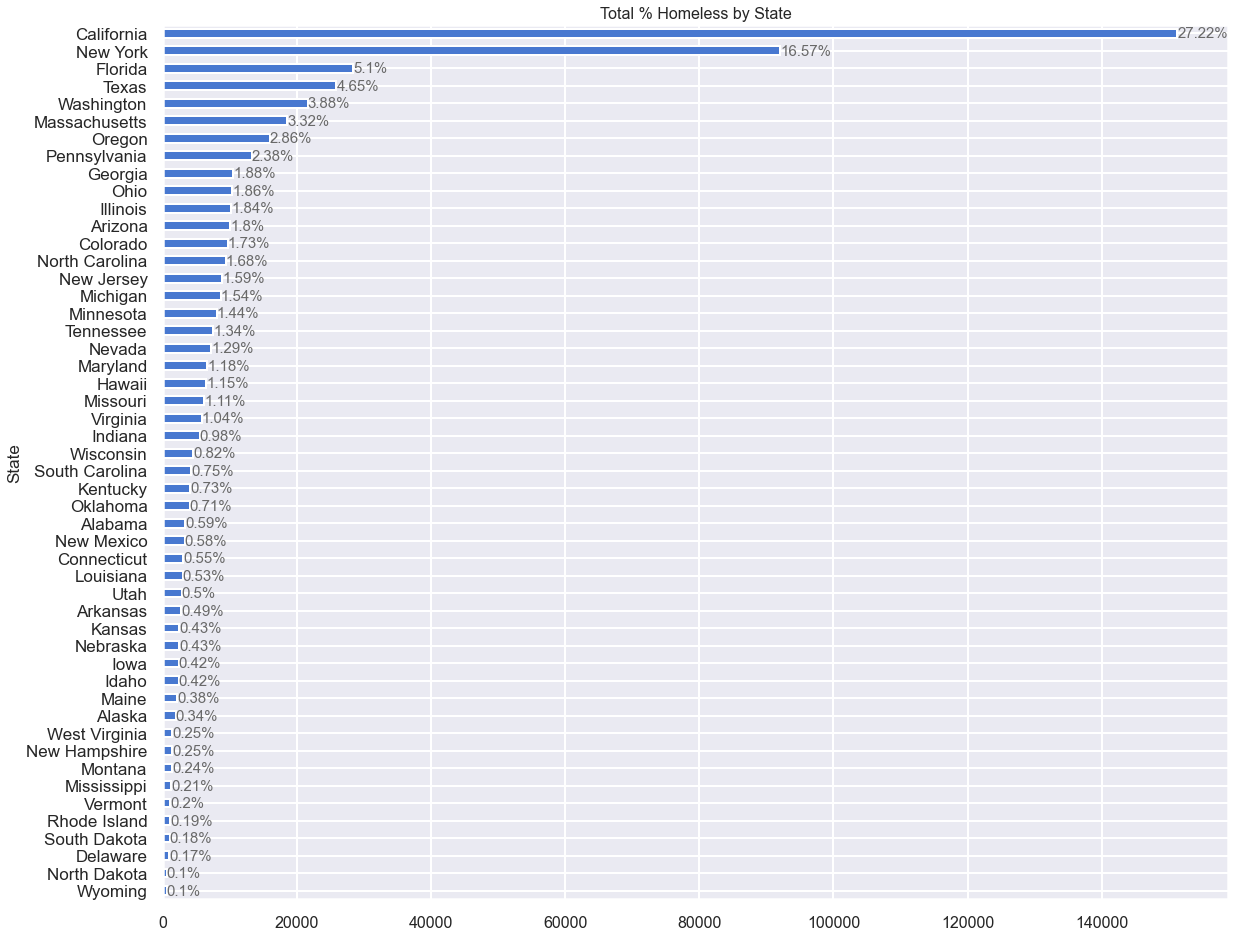

In [10]:
cmap = sns.color_palette("Blues", n_colors = 10)
ax = df.sort_values('Total Homeless' ,ascending=True)[['State','Total Homeless']]\
        .plot.barh(legend = False, stacked=True, title = 'Total % Homeless by State', x = 'State', figsize = (17,15));
ax.set_alpha(0.8)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.4, i.get_y(), \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

plt.show();


### Total Homeless by each State (Counts)

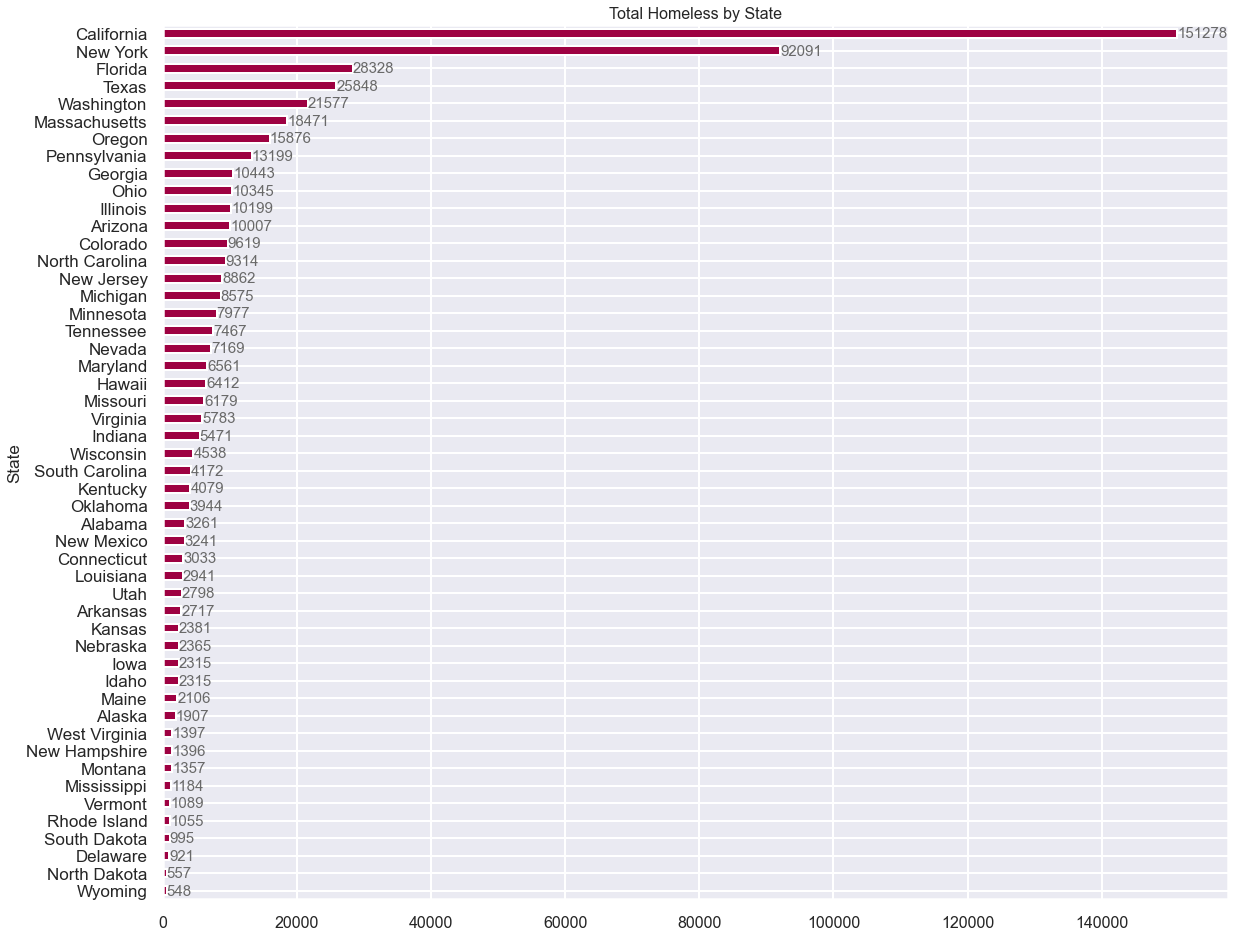

In [11]:
ax = df.sort_values('Total Homeless' ,ascending=True)[['State','Total Homeless']]\
        .plot.barh(legend = False, stacked=True, title = 'Total Homeless by State', x = 'State', cmap = plt.get_cmap('Spectral'), figsize = (17,15));
ax.set_alpha(0.8)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.4, i.get_y(), \
            str(int(i.get_width())), fontsize=15,
color='dimgrey')

plt.show();

#### Lollipon Plot  
## Percentage of Homeless to the Total Population

In [12]:
dfpct = df.sort_values(by = 'Percentage 1', axis=0, ascending = True).reset_index(drop = True)
dfpct

State  Total Homeless  Population  Percentage 1  \
0      Mississippi          1184.0   2976149.0      0.039783   
1        Louisiana          2941.0   4648794.0      0.063264   
2          Alabama          3261.0   4903185.0      0.066508   
3         Virginia          5783.0   8535519.0      0.067752   
4     North Dakota           557.0    762062.0      0.073091   
5             Iowa          2315.0   3155070.0      0.073374   
6        Wisconsin          4538.0   5822434.0      0.077940   
7    West Virginia          1397.0   1792147.0      0.077951   
8         Illinois         10199.0  12671821.0      0.080486   
9   South Carolina          4172.0   5148714.0      0.081030   
10         Indiana          5471.0   6732219.0      0.081266   
11          Kansas          2381.0   2913314.0      0.081728   
12     Connecticut          3033.0   3565287.0      0.085070   
13        Michigan          8575.0   9986857.0      0.085863   
14            Utah          2798.0   3205958.0      0.087275   
15            Ohio         10345.0  11689100.0      0.088501   
16  North Carolina          9314.0  10488084.0      0.088806   
17           Texas         25848.0  28995881.0      0.089144   
18        Arkansas          2717.0   3017825.0      0.090032   
19        Kentucky          4079.0   4467673.0      0.091300   
20        Delaware           921.0    973764.0      0.094581   
21         Wyoming           548.0    578759.0      0.094685   
22         Georgia         10443.0  10617423.0      0.098357   
23    Rhode Island          1055.0   1059361.0      0.099588   
24        Oklahoma          3944.0   3956971.0      0.099672   
25      New Jersey          8862.0   8882190.0      0.099773   
26        Missouri          6179.0   6137428.0      0.100677   
27   New Hampshire          1396.0   1359711.0      0.102669   
28    Pennsylvania         13199.0  12801989.0      0.103101   
29        Maryland          6561.0   6045680.0      0.108524   
30       Tennessee          7467.0   6833174.0      0.109276   
31    South Dakota           995.0    884659.0      0.112473   
32        Nebraska          2365.0   1934408.0      0.122260   
33         Montana          1357.0   1068778.0      0.126967   
34           Idaho          2315.0   1787065.0      0.129542   
35         Florida         28328.0  21477737.0      0.131895   
36         Arizona         10007.0   7278717.0      0.137483   
37       Minnesota          7977.0   5639632.0      0.141445   
38      New Mexico          3241.0   2096829.0      0.154567   
39           Maine          2106.0   1344212.0      0.156672   
40        Colorado          9619.0   5758736.0      0.167033   
41         Vermont          1089.0    623989.0      0.174522   
42          Nevada          7169.0   3080156.0      0.232748   
43          Alaska          1907.0    731545.0      0.260681   
44   Massachusetts         18471.0   6949503.0      0.265789   
45      Washington         21577.0   7614893.0      0.283353   
46          Oregon         15876.0   4217737.0      0.376410   
47      California        151278.0  39512223.0      0.382864   
48          Hawaii          6412.0   1415872.0      0.452866   
49        New York         92091.0  19453561.0      0.473389   

    Percentage 2 - USICH  Homeless Households  Veterans  Young Adults  
0                   0.21                 69.0      72.0          56.0  
1                   0.52                170.0     360.0         188.0  
2                   0.58                236.0     292.0         320.0  
3                   1.02                652.0     447.0         258.0  
4                   0.10                 51.0      49.0          72.0  
5                   0.41                227.0     149.0         146.0  
6                   0.80                592.0     359.0         200.0  
7                   0.25                 79.0     137.0          89.0  
8                   1.80               1105.0     690.0         609.0  
9                   0.74    

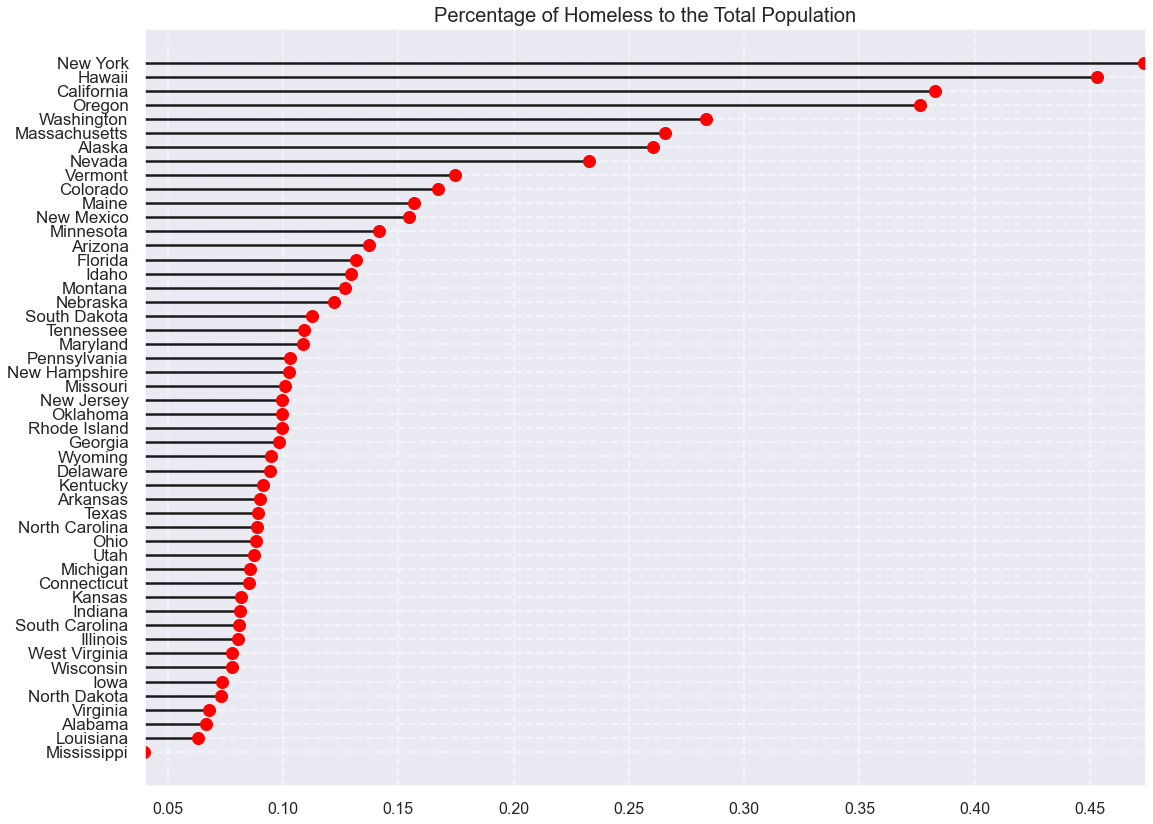

In [17]:
fig, ax = plt.subplots(figsize = (16,13))

ax.hlines(dfpct.State, xmin=0, xmax=dfpct['Percentage 1'])
ax.plot(dfpct['Percentage 1'], dfpct.State, "o", color='red')
ax.set_xlim(dfpct['Percentage 1'].min(), dfpct['Percentage 1'].max()+0.001)

    
# Decorate
plt.title('Percentage of Homeless to the Total Population', fontdict={'size':20});
plt.grid(linestyle='--', alpha=0.5);

plt.show();

In [61]:
params = {'legend.fontsize': '20',
          'figure.figsize': (15, 5),
         'axes.labelsize': '18',
         'axes.titlesize':'30',
         'xtick.labelsize':'16',
         'ytick.labelsize':'16'}
plt.rcParams.update(params)

plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#800000'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'


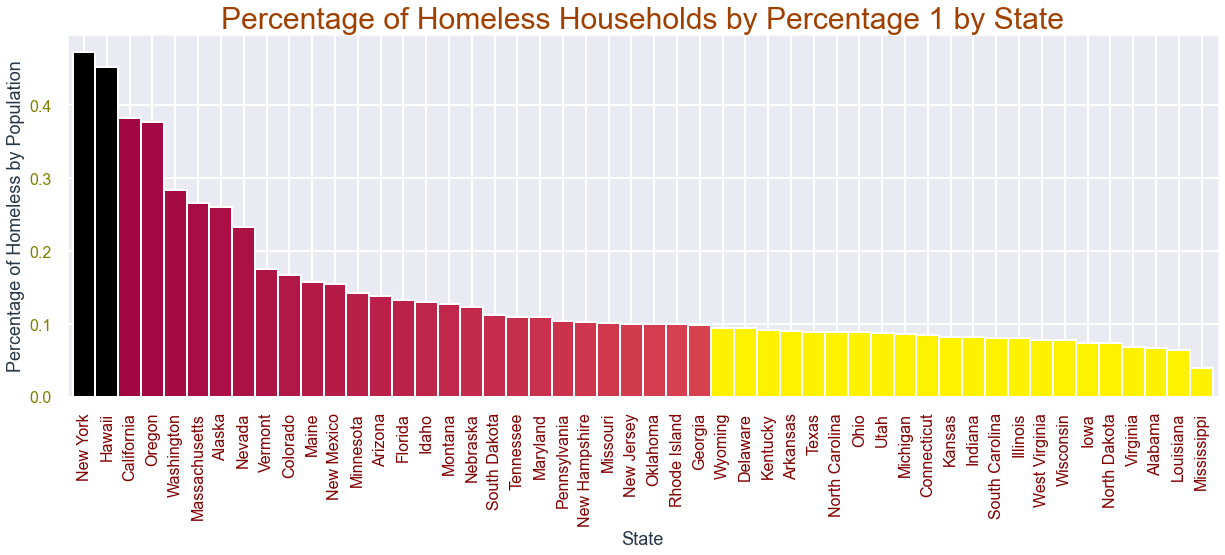

In [62]:
from decimal import Decimal
pd.options.display.float_format = '{:.2f}'.format
ax = df.sort_values('Percentage 1' ,ascending=False)[['State','Percentage 1']]\
        .plot.bar(legend = False, stacked=True, title = 'Percentage of Homeless Households by Percentage 1 by State', \
                   x = 'State', color=[plt.cm.Spectral(np.arange(len(df.State)))], figsize = (17,8), width = 1);
plt.xticks(rotation=90)
plt.tight_layout()

plt.xlabel('State')
plt.ylabel('Percentage of Homeless by Population')


pos = 0
ax.patches[pos].set_facecolor('#000000')

pos = 1
ax.patches[pos].set_facecolor('#000000')

for pos in range(28,50):
    ax.patches[pos].set_facecolor('#fff200')

plt.show();

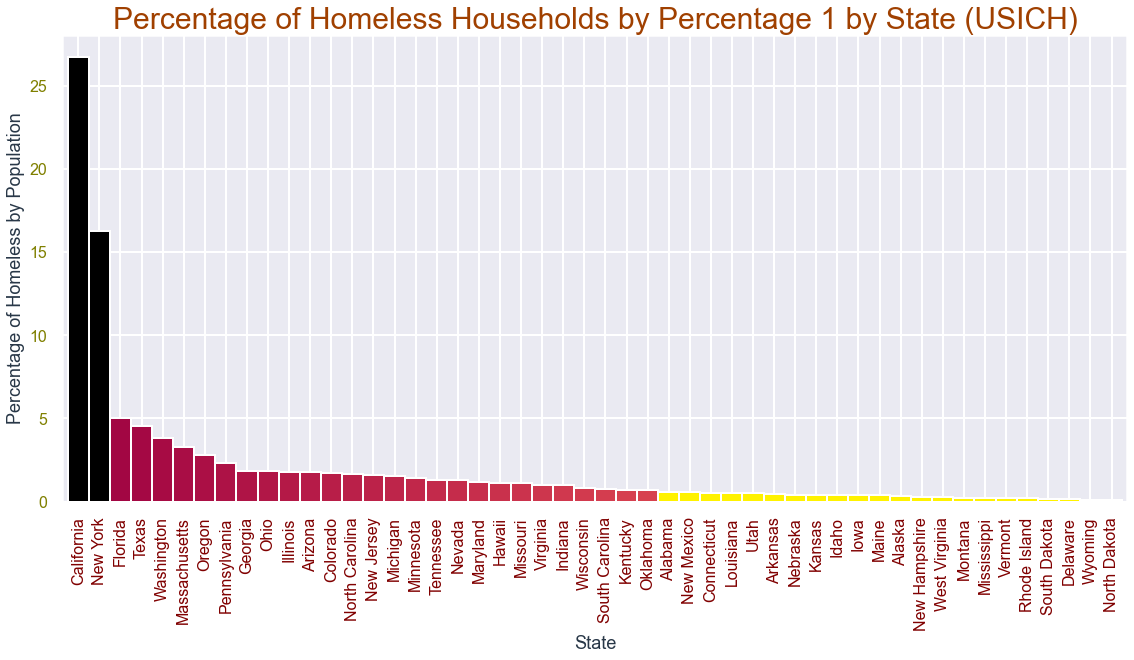

In [63]:
ax = df.sort_values('Percentage 2 - USICH' ,ascending=False)[['State','Percentage 2 - USICH']]\
        .plot.bar(legend = False, stacked=True, title = 'Percentage of Homeless Households by Percentage 1 by State (USICH)', \
                   x = 'State', color=[plt.cm.Spectral(np.arange(len(df.State)))], figsize = (17,8), width = 1);
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of Homeless by Population')

pos = 0
ax.patches[pos].set_facecolor('#000000')

pos = 1
ax.patches[pos].set_facecolor('#000000')

for pos in range(28,50):
    ax.patches[pos].set_facecolor('#fff200')

plt.show();

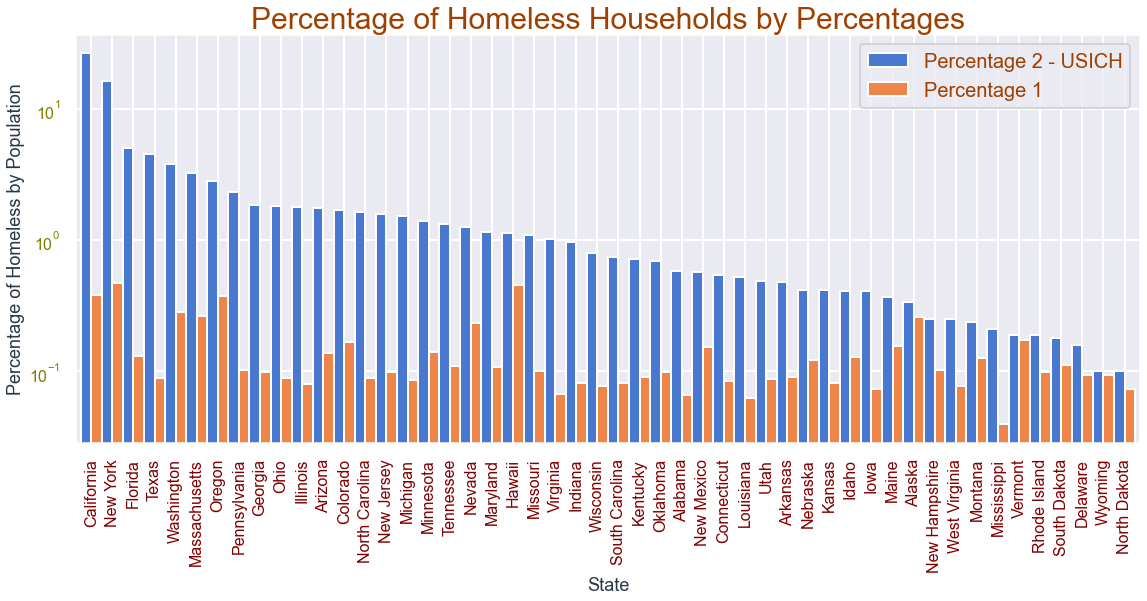

In [80]:
# With Log axis
df_pct_grp = df.set_index('State');
df_pct_grp[['Percentage 2 - USICH', 'Percentage 1']].plot(kind='bar', figsize = (17,7), width = 1, logy = True, stacked=False);

plt.title('Percentage of Homeless Households by Percentages')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of Homeless by Population')

plt.show();

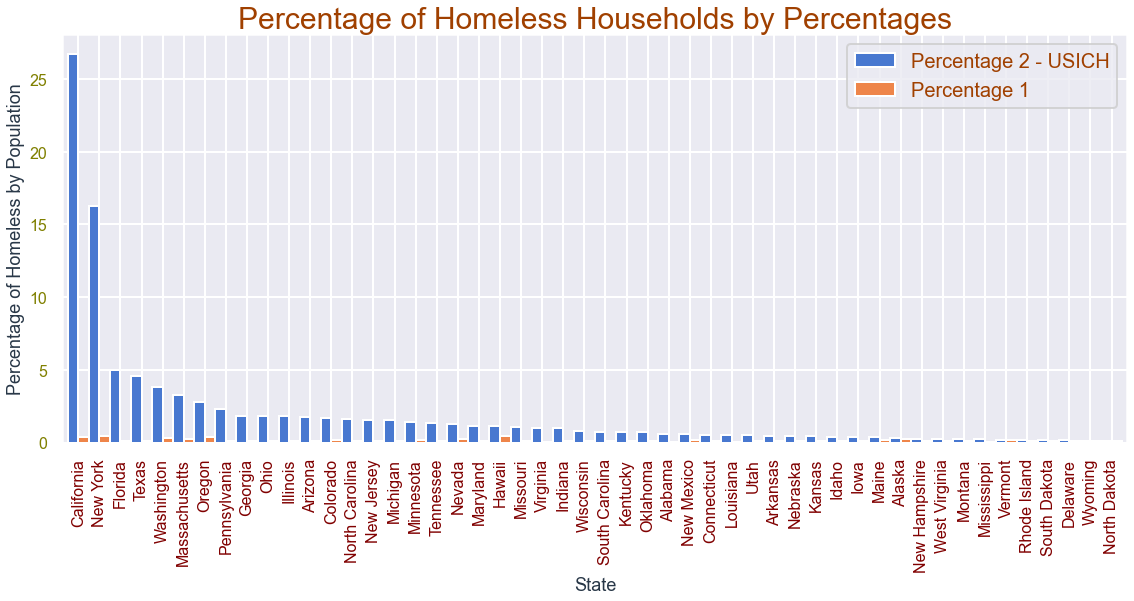

In [79]:
# Without Log axis
df_pct_grp = df.set_index('State');
df_pct_grp[['Percentage 2 - USICH', 'Percentage 1']].plot(kind='bar', figsize = (17,7), width = 1, logy = False, stacked=False);

plt.title('Percentage of Homeless Households by Percentages')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of Homeless by Population')

plt.show();

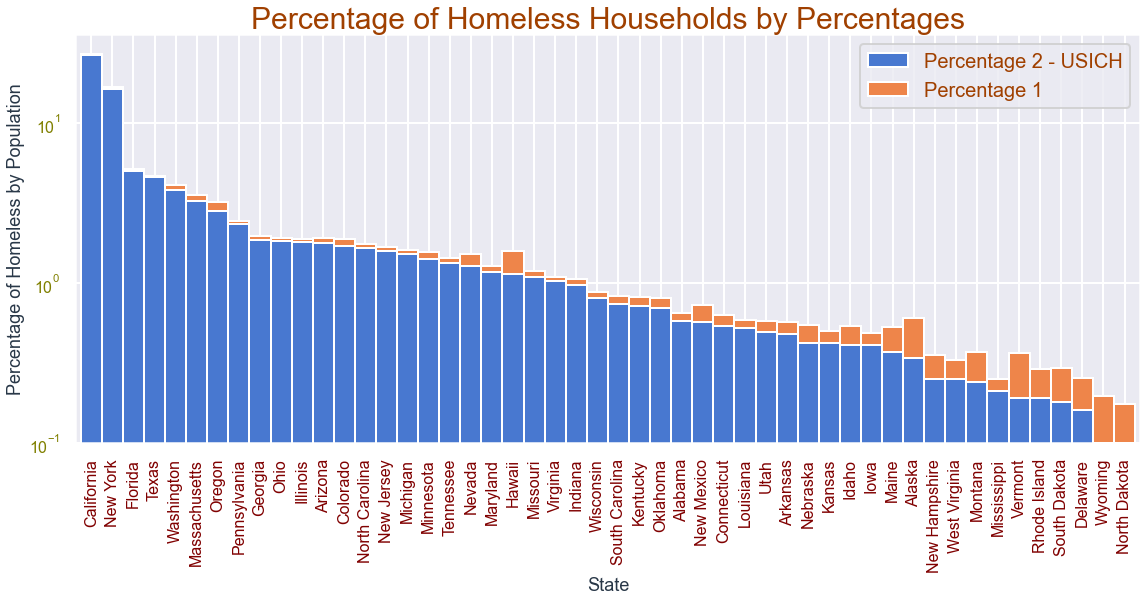

In [82]:
# With Log axis and Stacked
df_pct_grp = df.set_index('State');
df_pct_grp[['Percentage 2 - USICH', 'Percentage 1']].plot(kind='bar', figsize = (17,7), width = 1, logy = True, stacked=True);

plt.title('Percentage of Homeless Households by Percentages')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of Homeless by Population')

plt.show();

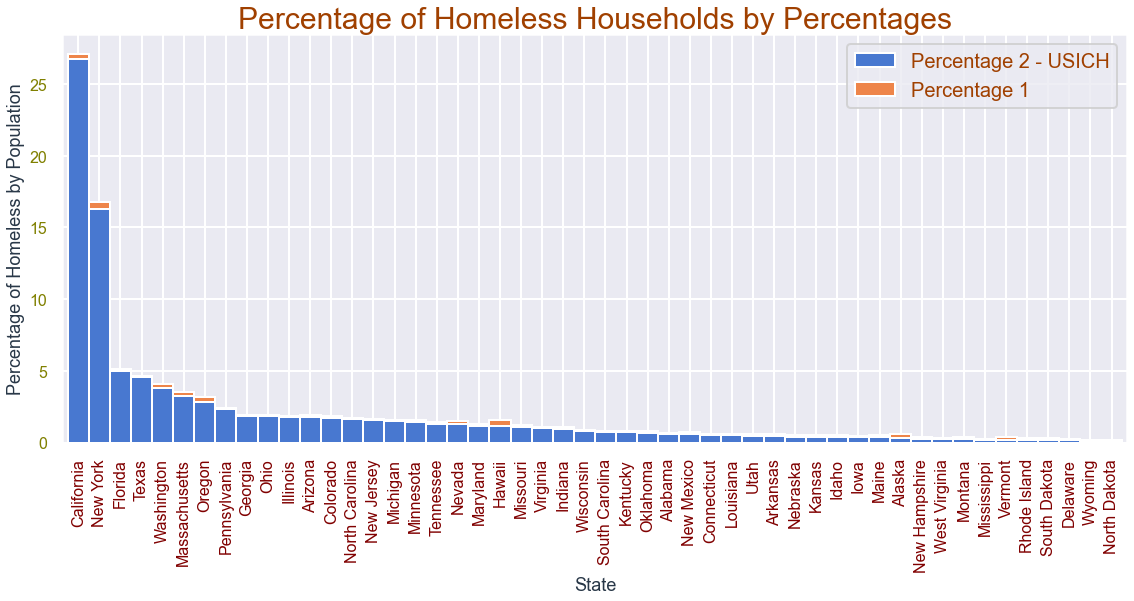

In [81]:
# Without Log axis and Stacked
df_pct_grp = df.set_index('State');
df_pct_grp[['Percentage 2 - USICH', 'Percentage 1']].plot(kind='bar', figsize = (17,7), width = 1, logy = False, stacked=True);

plt.title('Percentage of Homeless Households by Percentages')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of Homeless by Population')

plt.show();

#### Treemap
## Treemap of Total Homeless

In [86]:
params = {'legend.fontsize': '20',
          'figure.figsize': (15, 5),
         'axes.labelsize': '18',
         'axes.titlesize':'30',
         'xtick.labelsize':'16',
         'ytick.labelsize':'16'}
plt.rcParams.update(params)

plt.rcParams['text.color'] = '#000000'
plt.rcParams['xtick.color'] = '#800000'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'


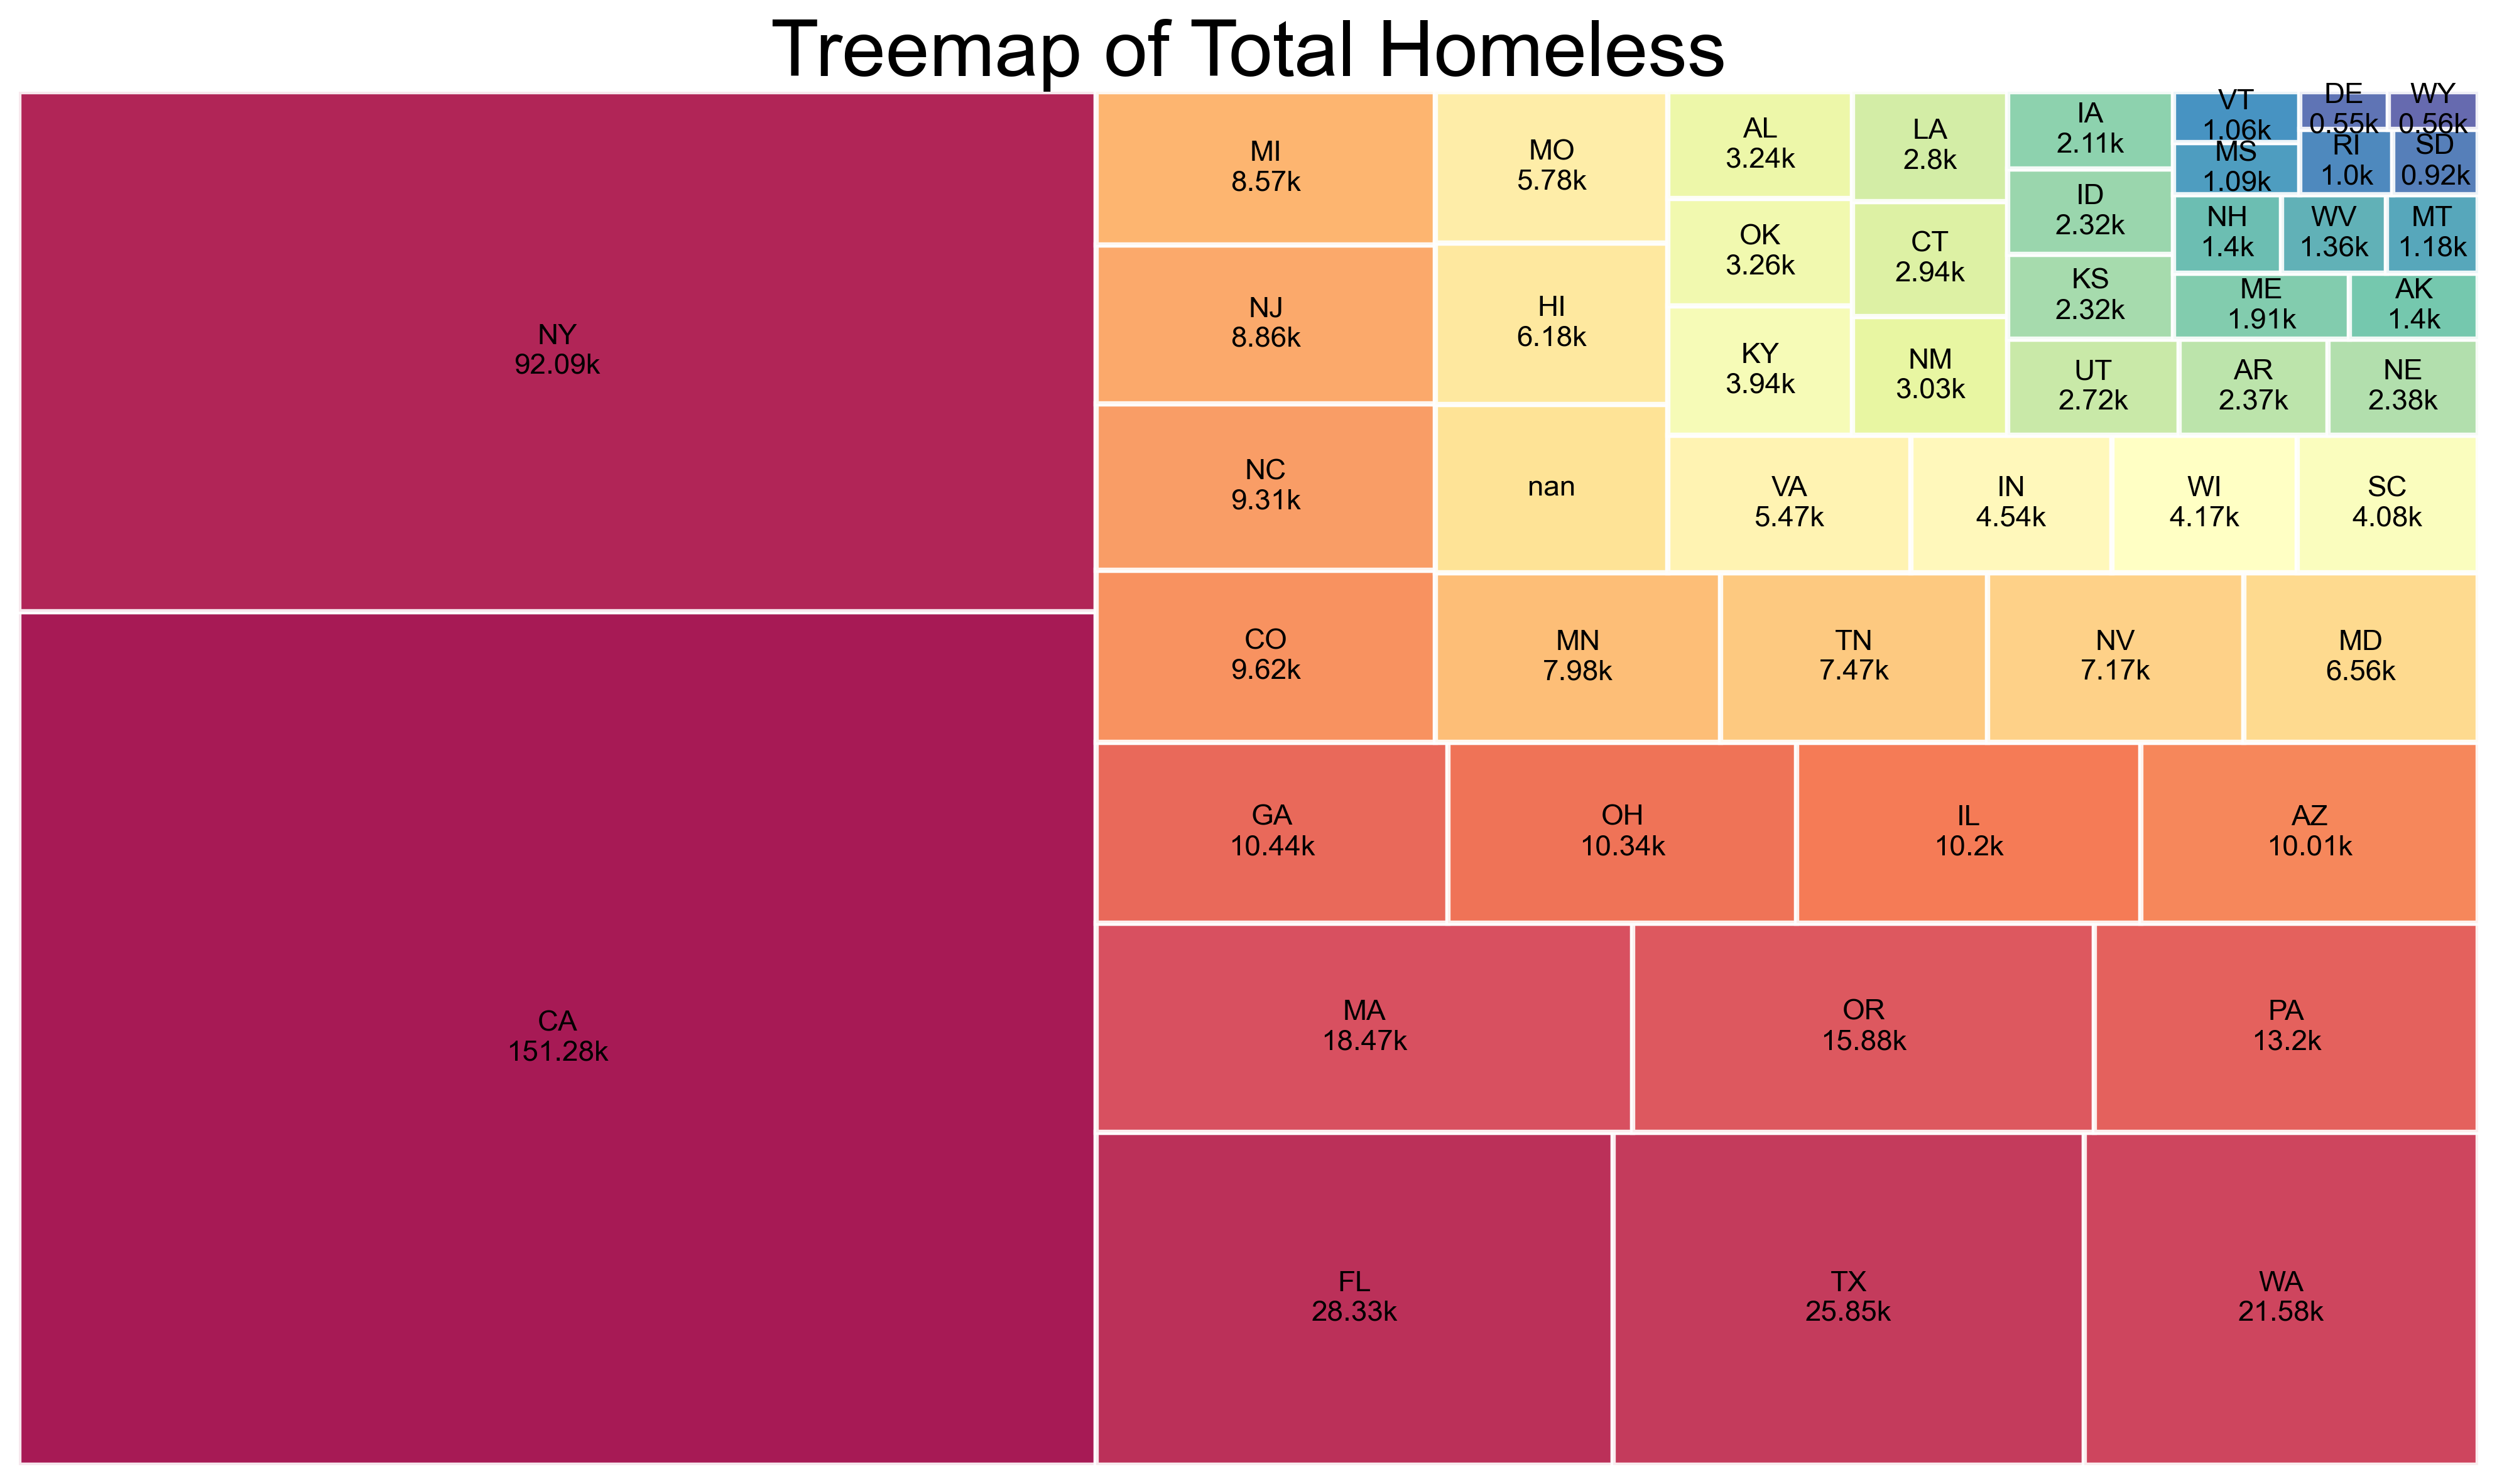

In [87]:
df = df_copy['Total Homeless']
labels = df_copy.Statecode
sizes = df_copy['Total Homeless']
labels_ = pd.Series([str(i) + 'k' for i in list(np.round(sizes.values/1000,2))])
final_labels = labels  + '\n' + labels_
    
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 300)
squarify.plot(sizes=sizes, label=final_labels, color=colors, bar_kwargs={'alpha':.9},text_kwargs={'fontsize':11})

# Decorate
plt.title('Treemap of Total Homeless')
plt.axis('off')
plt.show();

#### Stacked Bars

## Total Homeless by Groups - Veterans/Young Adults

In [88]:
df_copy

State  Total Homeless  Population  Percentage 1  \
0       California       151278.00 39512223.00          0.38   
1         New York        92091.00 19453561.00          0.47   
2          Florida        28328.00 21477737.00          0.13   
3            Texas        25848.00 28995881.00          0.09   
4       Washington        21577.00  7614893.00          0.28   
5    Massachusetts        18471.00  6949503.00          0.27   
6           Oregon        15876.00  4217737.00          0.38   
7     Pennsylvania        13199.00 12801989.00          0.10   
8          Georgia        10443.00 10617423.00          0.10   
9             Ohio        10345.00 11689100.00          0.09   
10        Illinois        10199.00 12671821.00          0.08   
11         Arizona        10007.00  7278717.00          0.14   
12        Colorado         9619.00  5758736.00          0.17   
13  North Carolina         9314.00 10488084.00          0.09   
14      New Jersey         8862.00  8882190.00          0.10   
15        Michigan         8575.00  9986857.00          0.09   
16       Minnesota         7977.00  5639632.00          0.14   
17       Tennessee         7467.00  6833174.00          0.11   
18          Nevada         7169.00  3080156.00          0.23   
19        Maryland         6561.00  6045680.00          0.11   
21          Hawaii         6412.00  1415872.00          0.45   
22        Missouri         6179.00  6137428.00          0.10   
23        Virginia         5783.00  8535519.00          0.07   
24         Indiana         5471.00  6732219.00          0.08   
25       Wisconsin         4538.00  5822434.00          0.08   
26  South Carolina         4172.00  5148714.00          0.08   
27        Kentucky         4079.00  4467673.00          0.09   
28        Oklahoma         3944.00  3956971.00          0.10   
29         Alabama         3261.00  4903185.00          0.07   
30      New Mexico         3241.00  2096829.00          0.15   
31     Connecticut         3033.00  3565287.00          0.09   
32       Louisiana         2941.00  4648794.00          0.06   
33            Utah         2798.00  3205958.00          0.09   
34        Arkansas         2717.00  3017825.00          0.09   
35        Nebraska         2365.00  1934408.00          0.12   
36          Kansas         2381.00  2913314.00          0.08   
37           Idaho         2315.00  1787065.00          0.13   
38            Iowa         2315.00  3155070.00          0.07   
39           Maine         2106.00  1344212.00          0.16   
40          Alaska         1907.00   731545.00          0.26   
41   New Hampshire         1396.00  1359711.00          0.10   
42   West Virginia         1397.00  1792147.00          0.08   
43         Montana         1357.00  1068778.00          0.13   
44     Mississippi         1184.00  2976149.00          0.04   
45         Vermont         1089.00   623989.00          0.17   
46    Rhode Island         1055.00  1059361.00          0.10   
47    South Dakota          995.00   884659.00          0.11   
48        Delaware          921.00   973764.00          0.09   
49         Wyoming          548.00   578759.00          0.09   
50    North Dakota          557.00   762062.00          0.07   

    Percentage 2 - USICH  Homeless Households  Veterans  Young Adults  \
0                  26.73              7044.00  10980.00      11993.00   
1                  16.27             15091.00   1270.00       2978.00   
2                   5.01              2171.00   2472.00       1450.00   
3                   4.57              1919.00   1806.00       1355.00   
4                   3.81              1751.00   1585.00       1911.00   
5                   3.26              3766.00    917.00        480.00   
6                   2.81              1147.00   1438.00       1590.00   
7                   2.33              1569.00    857.00        737.00   
8                   1.85               815.00    801.00        596.00   
9                 

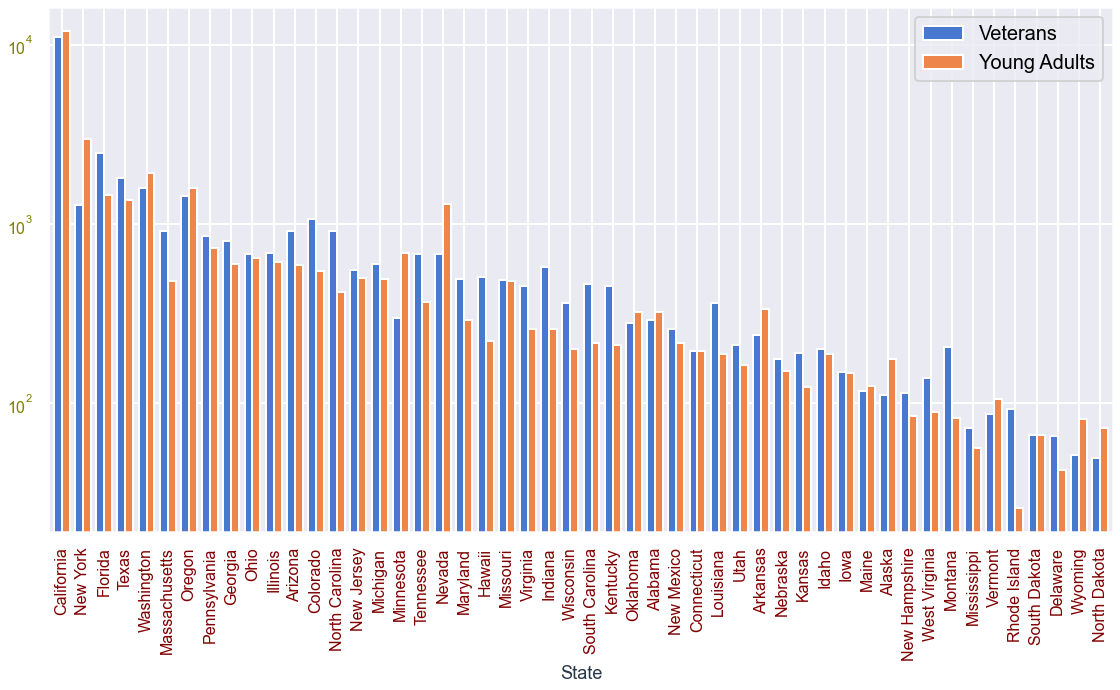

In [91]:
df_copy_grp = df_copy.set_index('State');
df_copy_grp[['Veterans','Young Adults']].plot(kind='bar', figsize = (17,9), stacked=False,logy=True, width = 0.75);

### Scatterplot
## Population versus Total Homeless by State

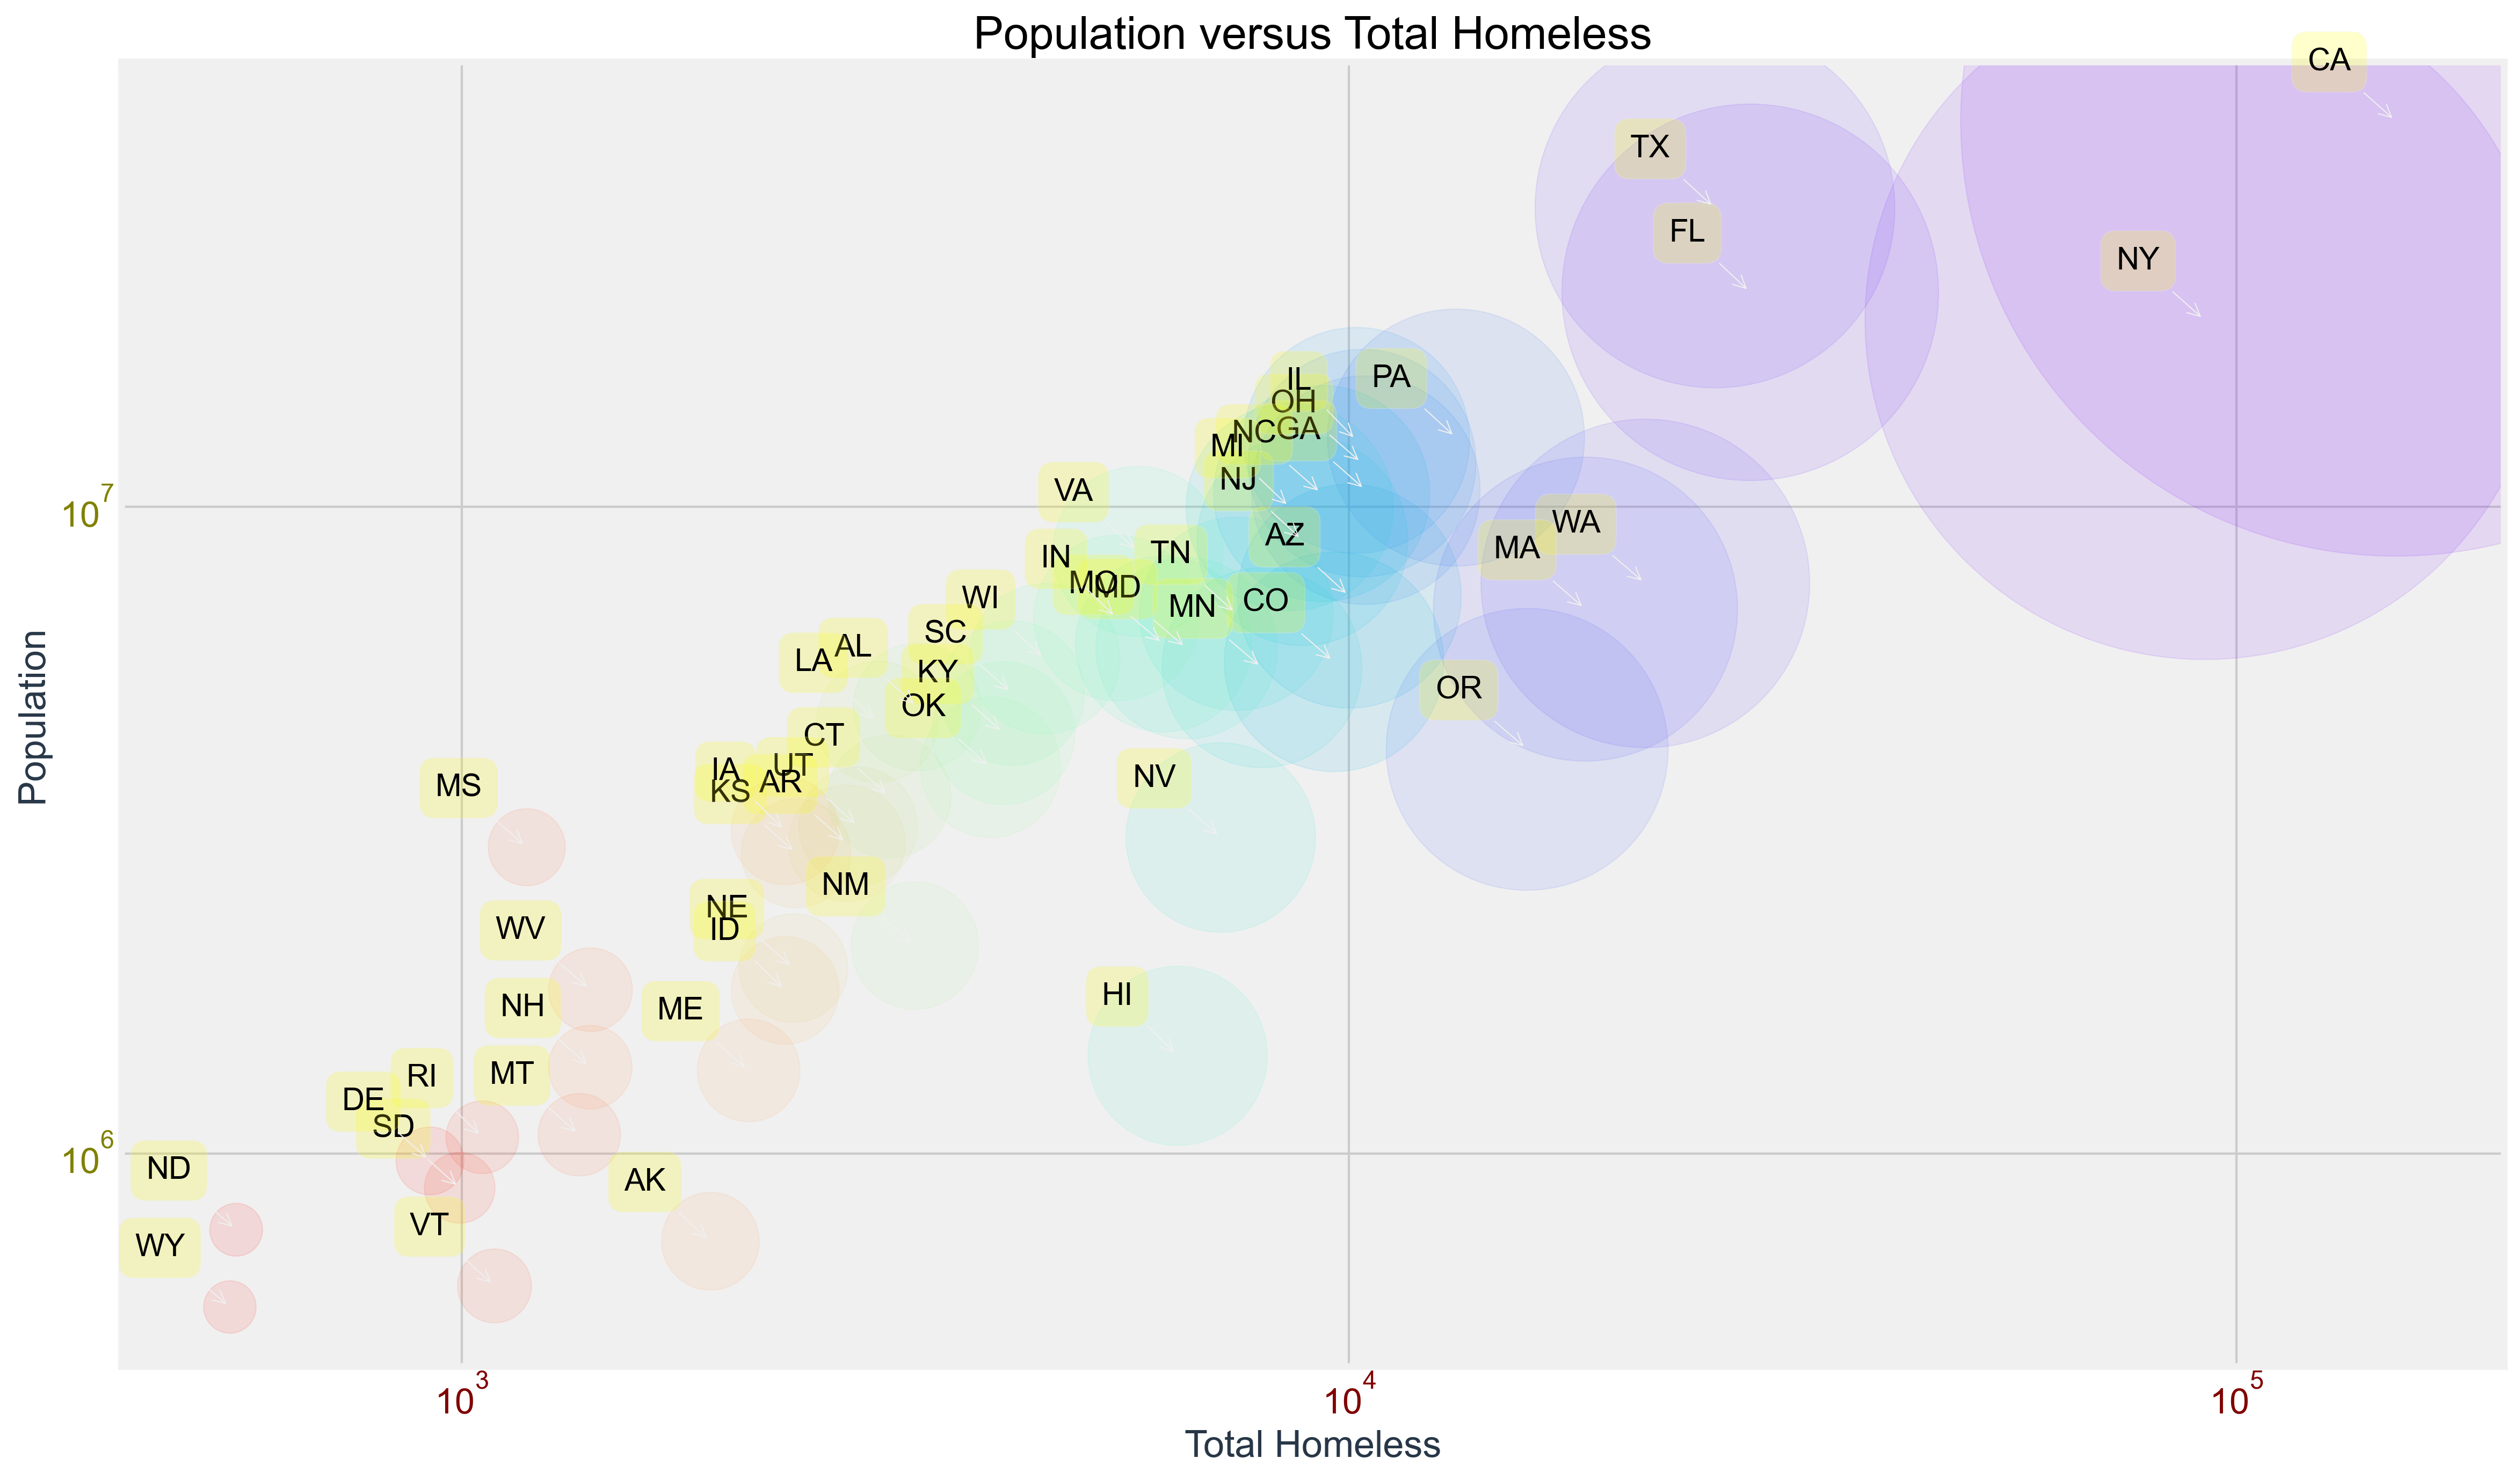

In [92]:
plt.figure(figsize=(17,10), dpi= 300)
plt.style.use('fivethirtyeight')
colors = cm.rainbow(np.linspace(0, 1, 50))
ax = plt.scatter(df_copy['Total Homeless'], df_copy['Population'], s=df_copy['Total Homeless'],c = colors,  alpha=0.1, cmap = plt.get_cmap('Spectral'))
plt.ylabel('Population')
plt.xlabel('Total Homeless')
plt.title('Population versus Total Homeless')

for label, x, y in zip(list(df_copy['Statecode']), df_copy['Total Homeless'], df_copy['Population']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.yscale('log')
plt.xscale('log')
plt.show();

#### Dotplot

## Homeless Households by each State

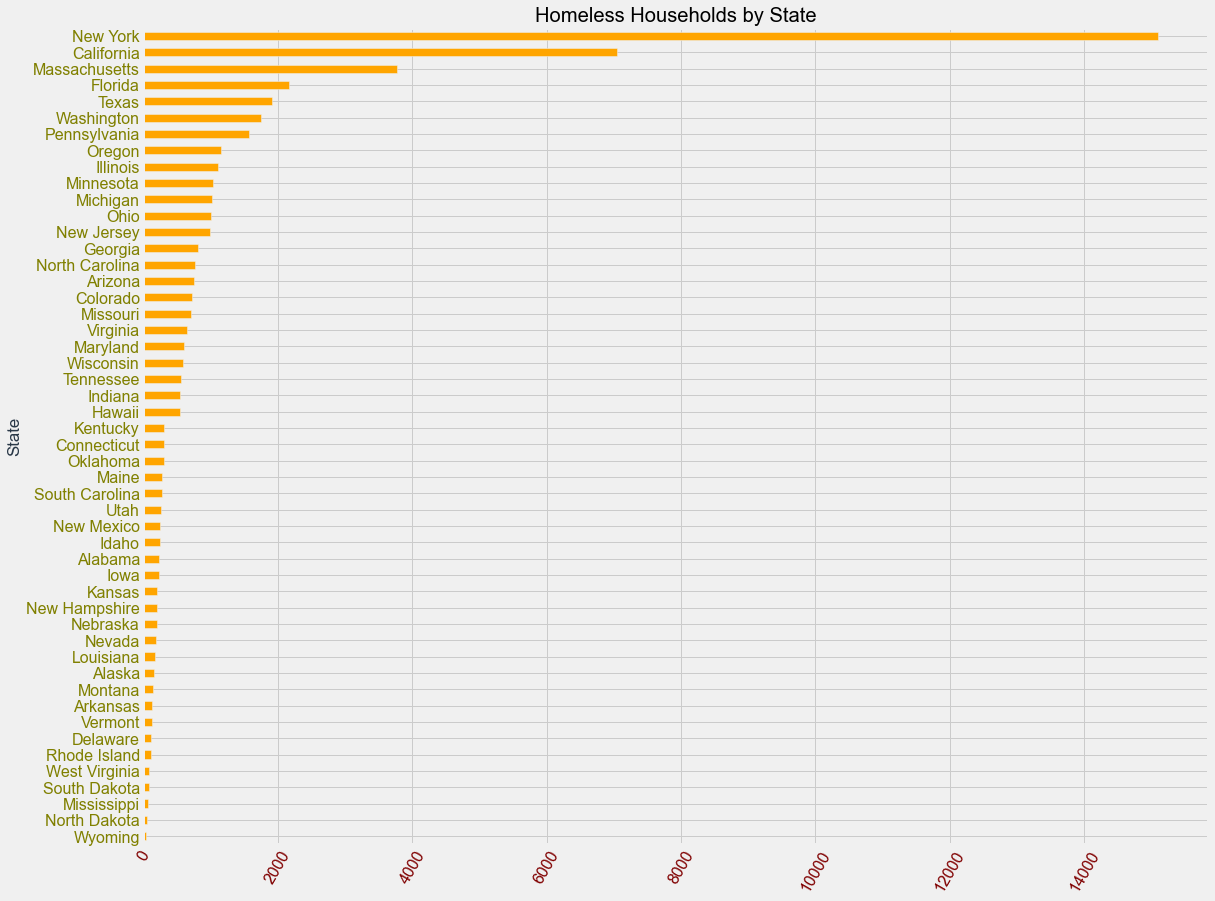

In [93]:
df_copy.sort_values('Homeless Households' ,ascending=True)[['State','Homeless Households']]\
        .plot.barh(legend = False, stacked=True, title = 'Homeless Households by State', x = 'State', color = 'orange', figsize = (17,14));
plt.xticks(rotation=60)
plt.show();

#### Diverging Bars
If you want to see the varyiation based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool. It helps to quickly differentiate the performance of items(for example State in this case)  and is quite intuitive and instantly conveys the point.

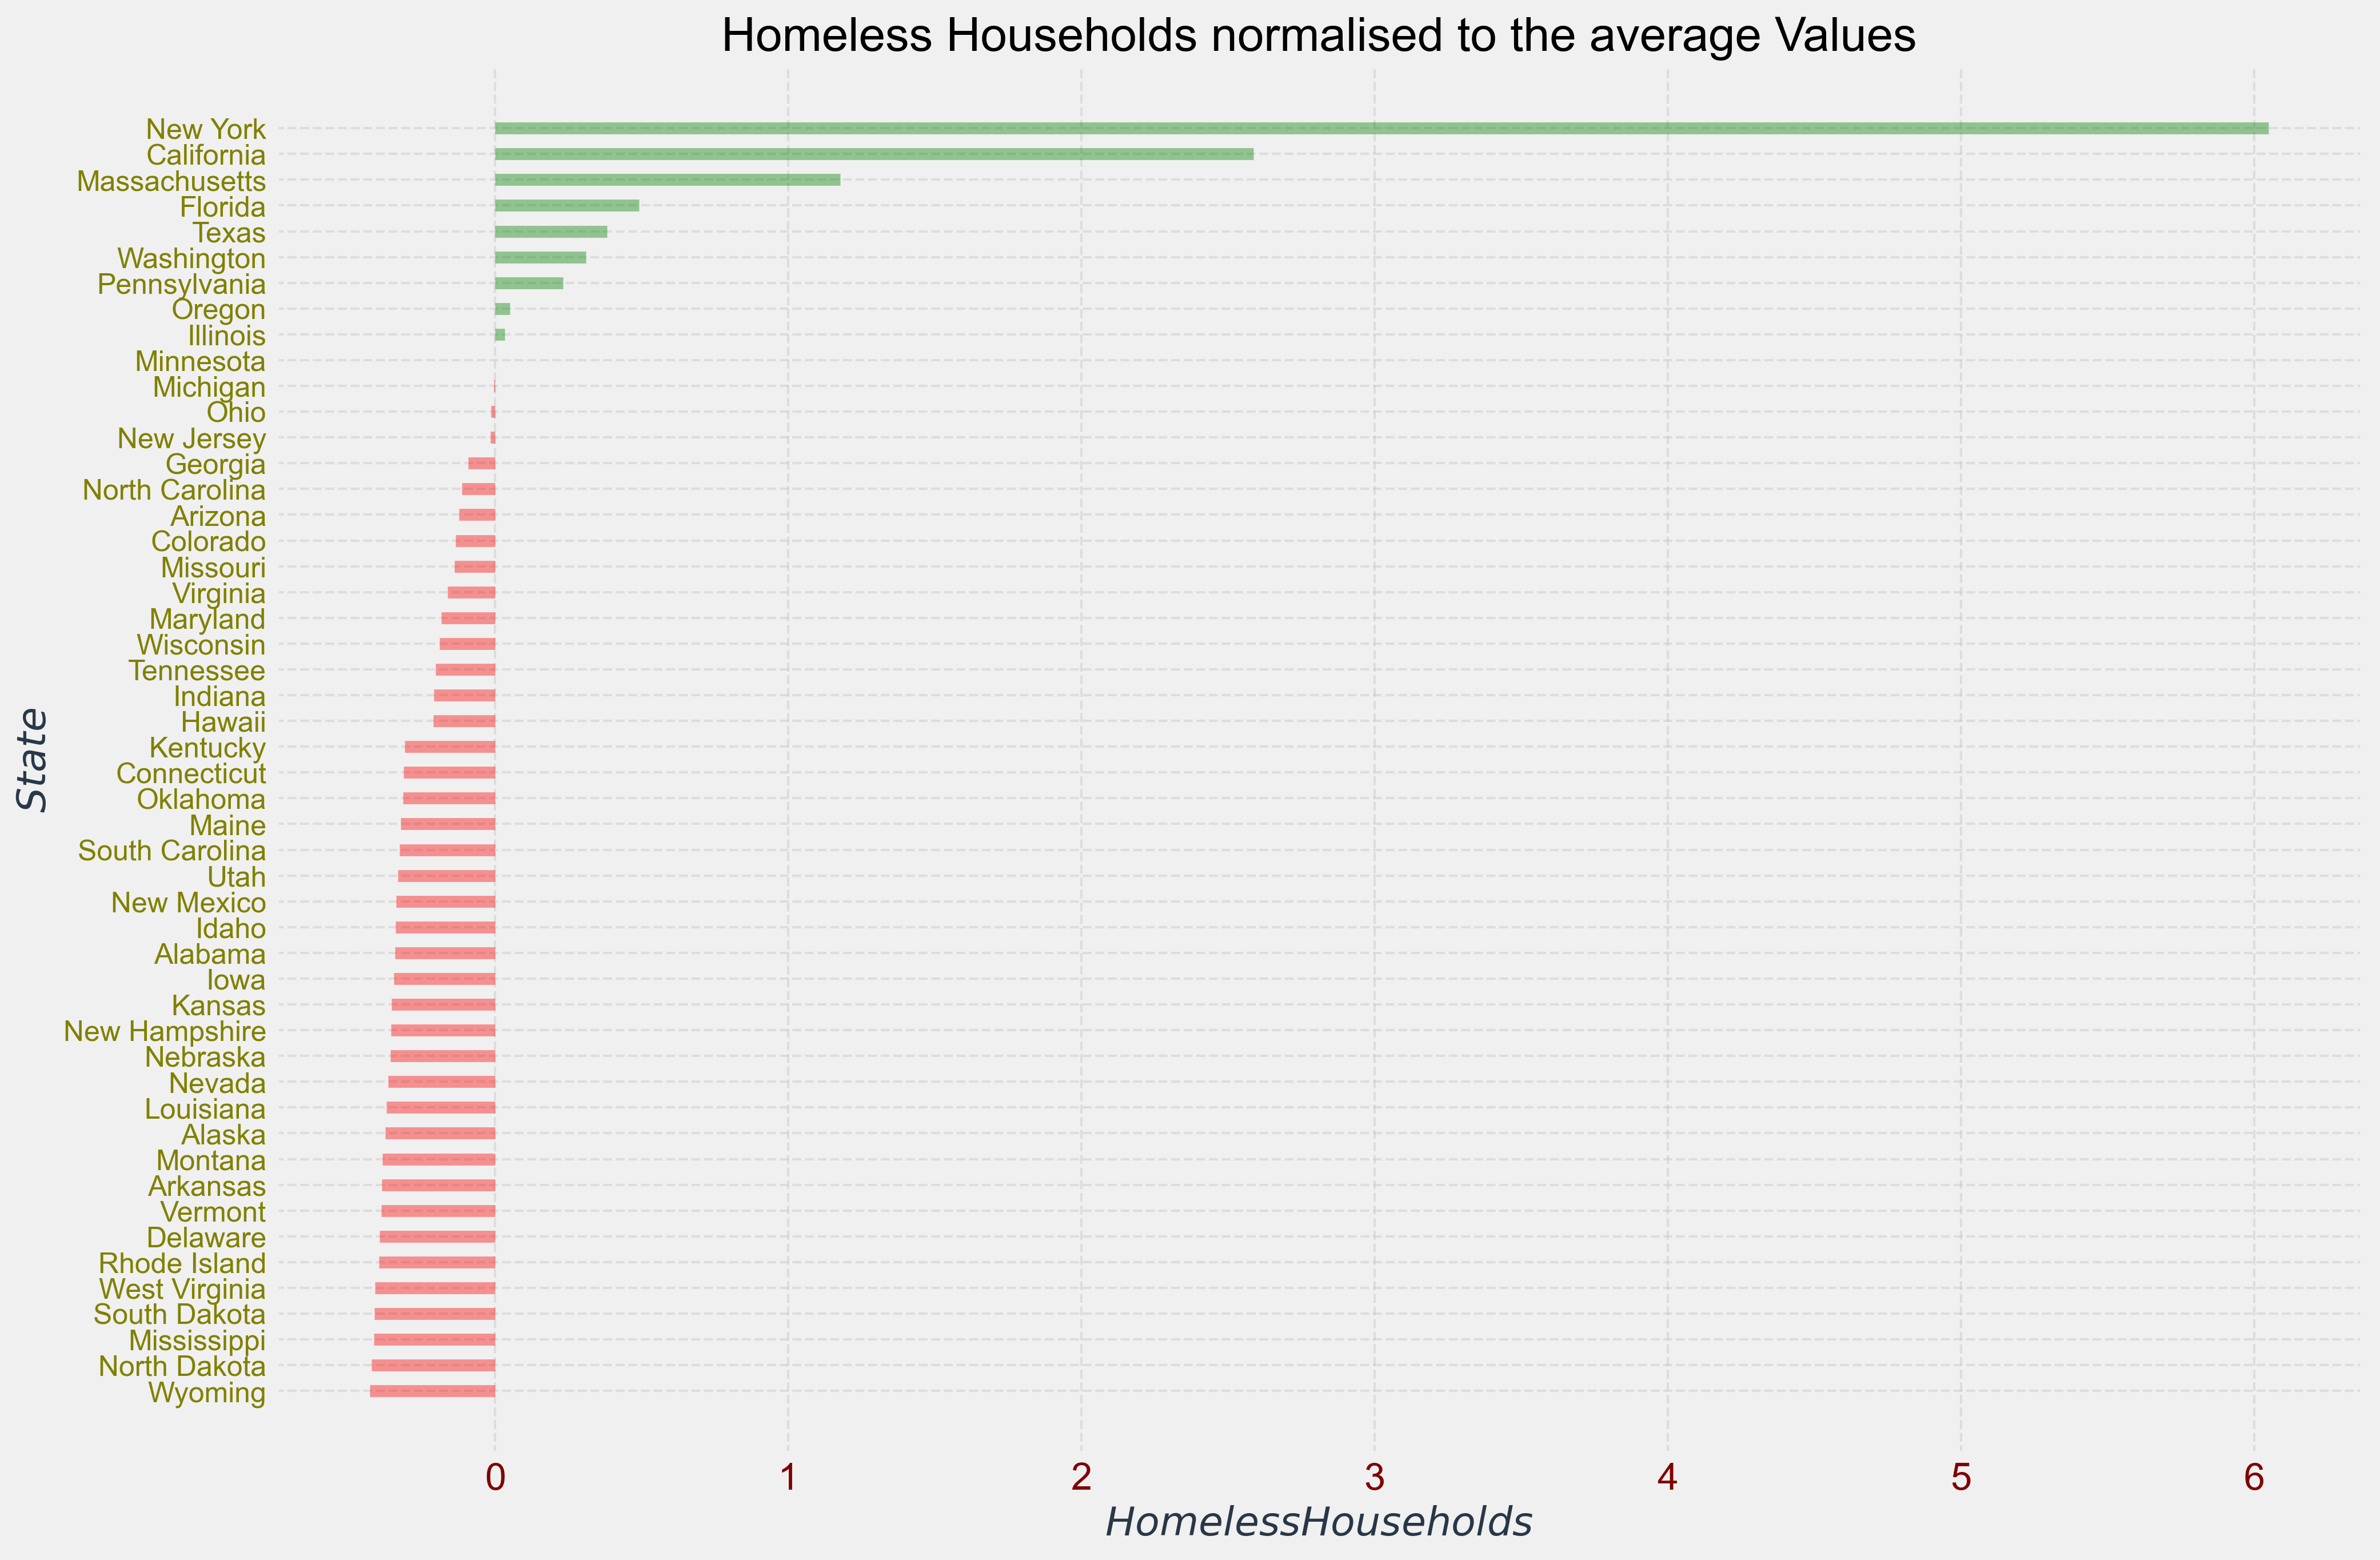

In [94]:
x = df_copy.loc[:, ['Homeless Households']]
df_copy['mean Homeless Households'] = (x - x.mean())/x.std()
df_copy['colors'] = ['red' if x < 0 else 'green' for x in df_copy['mean Homeless Households']]
df_copy.sort_values('mean Homeless Households', inplace=True)
df_copy = df_copy.reset_index(drop = True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 300)
plt.hlines(y=df_copy.index, xmin=0, xmax=df_copy['mean Homeless Households'], color=df_copy.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$State$', xlabel='$Homeless Households$')
plt.yticks(df_copy.index, df_copy.State, fontsize=12)
plt.title('Homeless Households normalised to the average Values', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show();

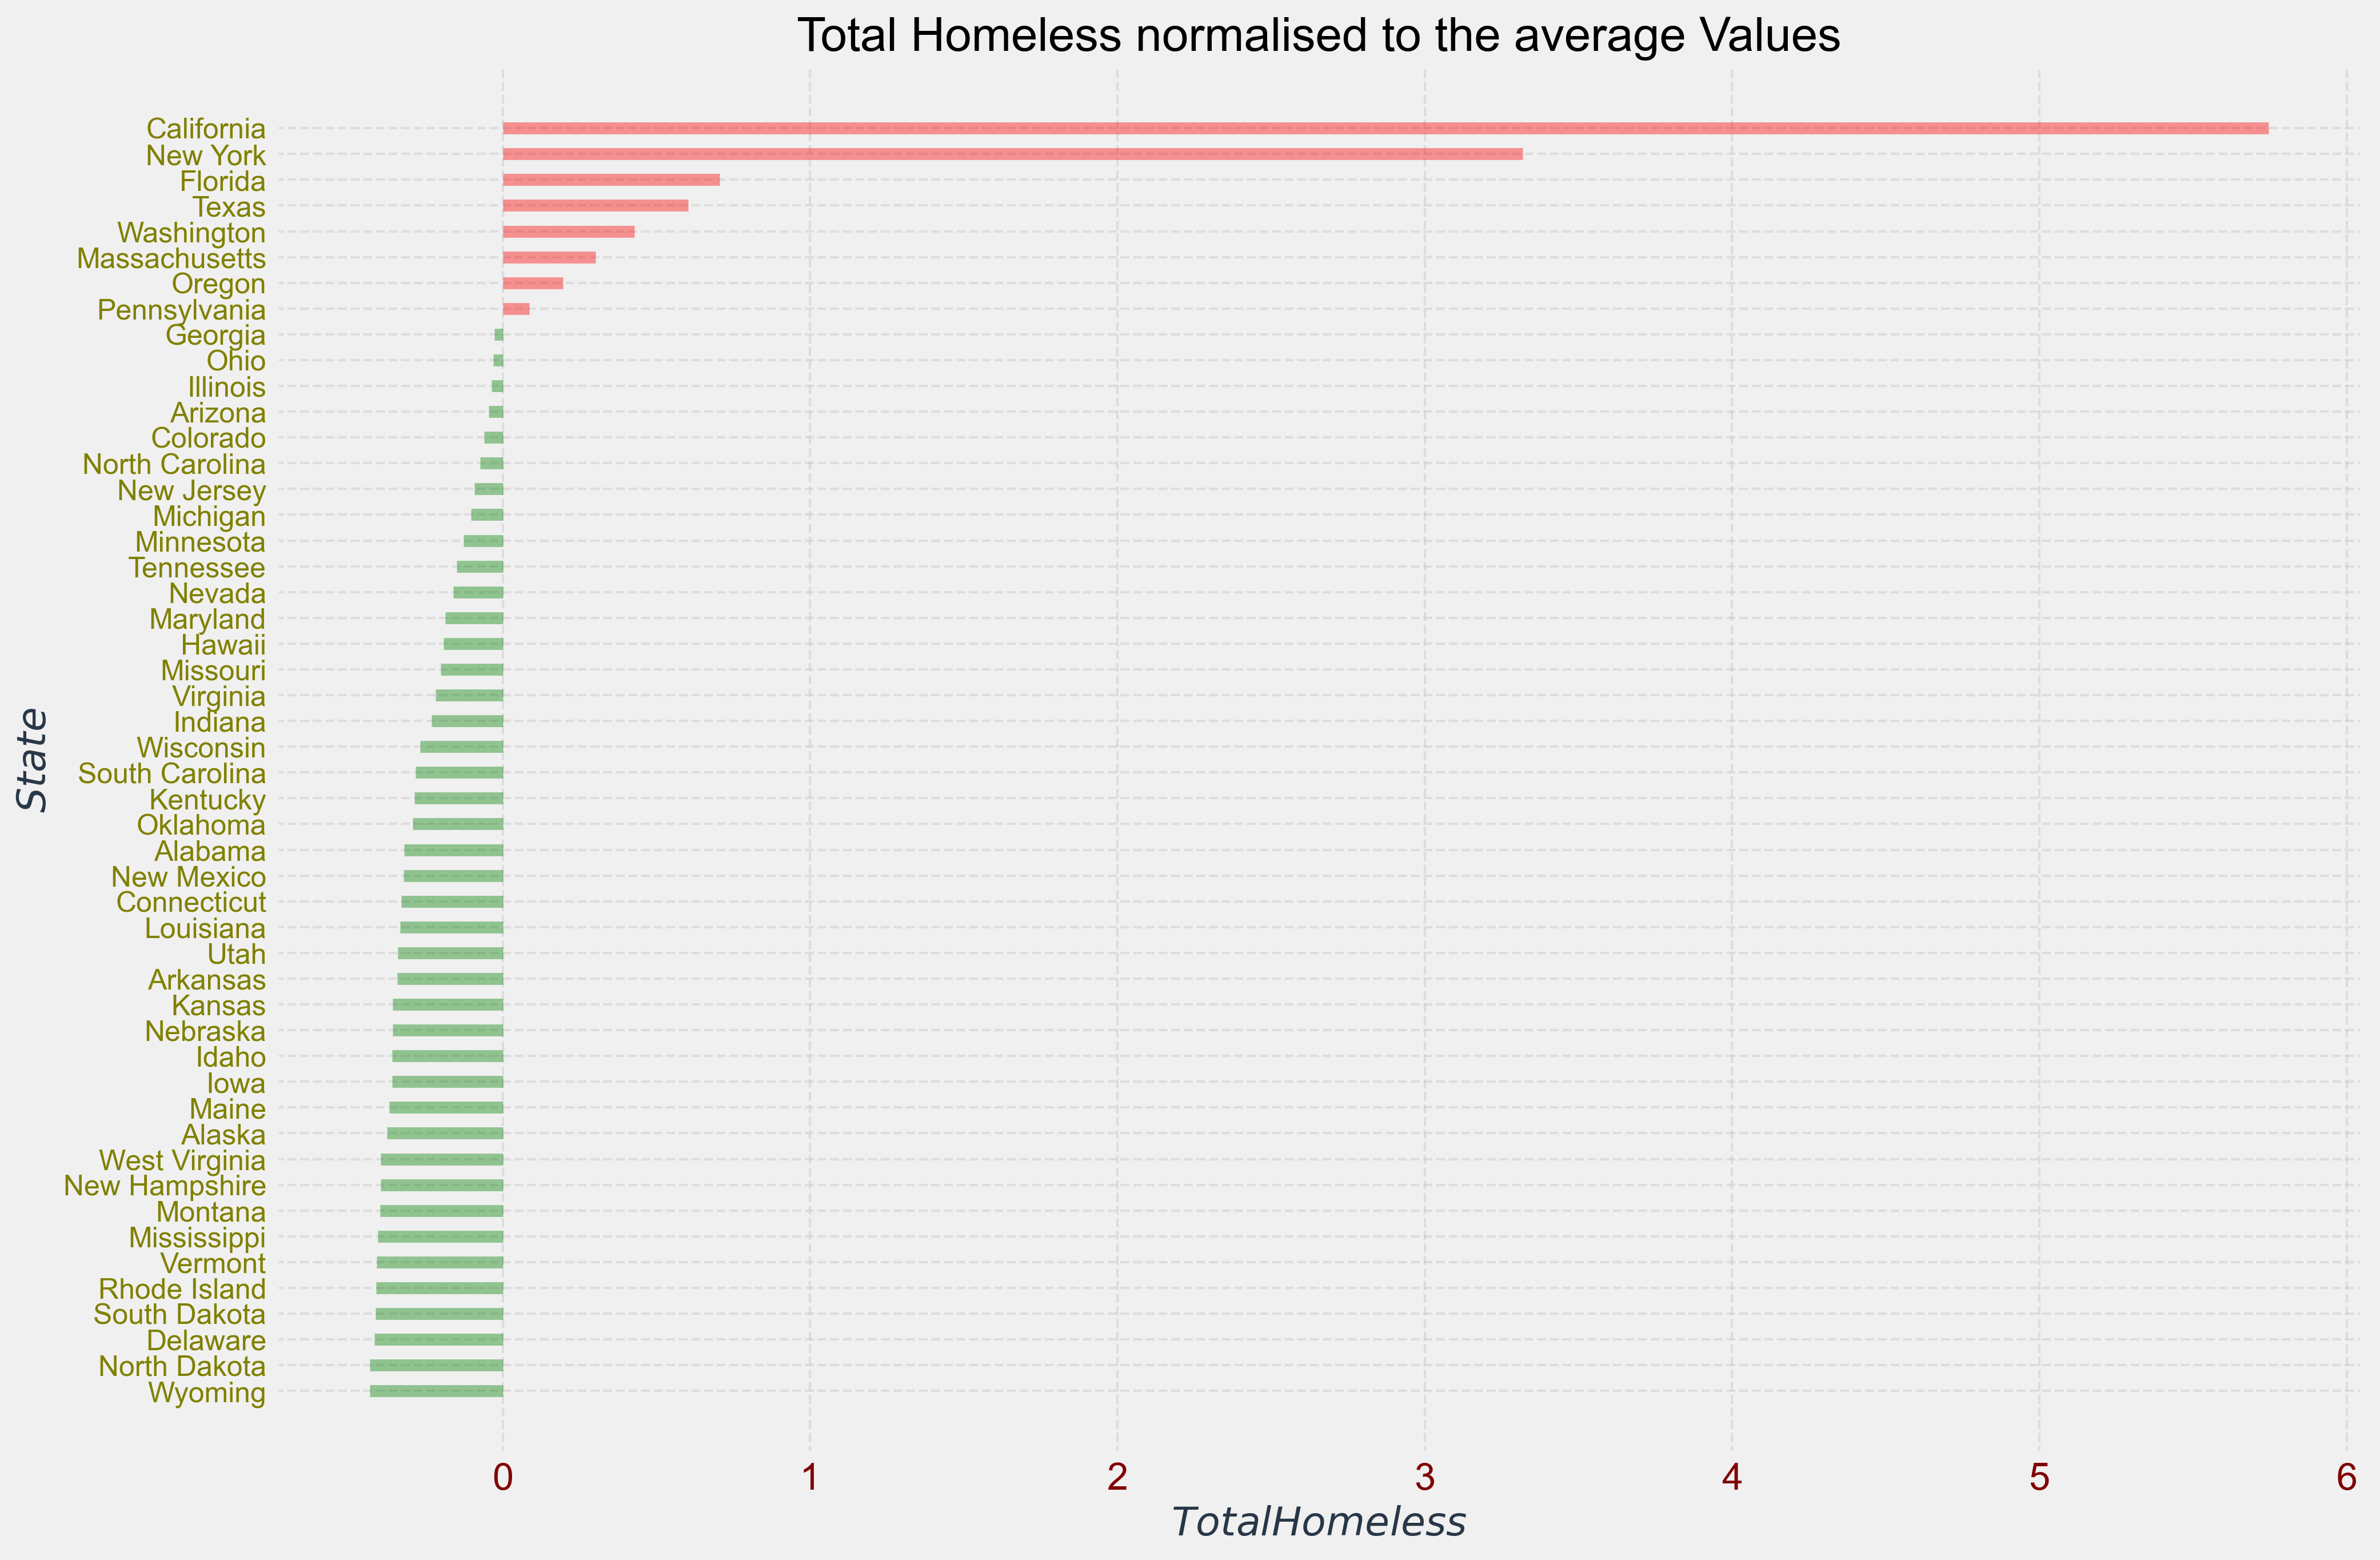

In [95]:
x = df_copy.loc[:, ['Total Homeless']]
df_copy['mean Total Homeless'] = (x - x.mean())/x.std()
df_copy['colors'] = ['red' if x > 0 else 'green' for x in df_copy['mean Total Homeless']]
df_copy.sort_values('mean Total Homeless', inplace=True)
df_copy = df_copy.reset_index(drop = True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 300)
plt.hlines(y=df_copy.index, xmin=0, xmax=df_copy['mean Total Homeless'], color=df_copy.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$State$', xlabel='$Total Homeless$')
plt.yticks(df_copy.index, df_copy.State, fontsize=12)
plt.title('Total Homeless normalised to the average Values', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show();